In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
risk_qa = pd.read_excel("risk_data.xlsx")

In [3]:
risk_qa.head(40)

,客戶編號,風險等級,風險等級分類,適性評量填寫日期,適性版號,題目序號,KYC_QUESTION,ANS_ORDER,ANS_ITEM,答題得分,客戶職業與任職部門,AGENT代碼
0,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A0,是否為其他國家稅務居住者?,1,1.否,0,NaN,9999999999
1,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A01,職業／行業別,8,8.退休人士,0,NaN,9999999999
2,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A02,職務,1,1.基層職員,0,NaN,9999999999
3,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A03,任職單位,1,1.任職公司／機構,0,寶豐,9999999999
4,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A03,任職單位,2,2.任職部門,0,營建,9999999999
5,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A04,學歷,4,4.大學,0,NaN,9999999999
6,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A05,婚姻狀況,3,3.不同意提供本項資料,0,NaN,9999999999
7,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A06,外國人士居留目的,1,1.為本國人士,0,NaN,9999999999
8,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A07,與政治人物之關係,1,1.與政治人物無關,0,NaN,9999999999
9,261909,5,積極型,2018-10-30 22:54:34.523,201809A,A08,投資目的(可複選),1,1.閒置資金運用,0,NaN,9999999999


In [4]:
uni_id = np.unique(risk_qa["客戶編號"])

In [5]:
uni_id.shape

(1884,)

In [6]:
attr_dict = defaultdict(lambda: defaultdict(list))
max_ans_dict = defaultdict(int) # record max answer num for each question (for one-hot array)

for index, row in risk_qa.iterrows():
    attr_dict[row["客戶編號"]]['QA風險等級'] = row['風險等級']
    if str(row['客戶職業與任職部門'])=='nan':
        attr_dict[row["客戶編號"]][row["題目序號"]].append(row["ANS_ORDER"])
    else:
        attr_dict[row["客戶編號"]][row["題目序號"]].append(str(row["ANS_ORDER"])+":"+row["客戶職業與任職部門"])
    if max_ans_dict[row["題目序號"]]<row["ANS_ORDER"]:
        max_ans_dict[row["題目序號"]] = row["ANS_ORDER"] 

In [7]:
for user in attr_dict:
    for q in attr_dict[user]:
        if q != 'QA風險等級':
            attr_dict[user][q] = list(set(attr_dict[user][q]))

In [8]:
ans = pd.DataFrame.from_dict(attr_dict).transpose()

In [9]:
ans.index.name = '客戶'

In [10]:
ans.head()

,A0,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,A13,A14,B01,B02,B03,B04,B05,B06,B07,QA風險等級
客戶,,,,,,,,,,,,,,,,,,,,,
261909,[1],[8],[1],"[1:寶豐, 2:營建]",[4],[3],[1],[1],"[1, 3, 5]","[2, 3]",...,[1],[4],[3],"[1, 2, 3, 4, 5]","[3, 4, 5]",[5],[4],[4],[4],5
269963,[1],[6],[1],"[2:內科, 1:桃園醫院]",[4],[2:2],[1],[1],"[3, 4, 5]","[1, 3]",...,[1],[4],[5],"[4, 5]","[4, 5]",[3],[3],[2],[1],5
270057,[1],[3],[1],"[2:信用卡部, 1:渣打]",[4],[2:1],[1],[1],"[1, 4, 5]",[1],...,[1],[4],[5],"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]",[3],[3],[2],[2],5
270507,[1],[5],[2],"[2:000, 1:0000]",[4],[2:3],[1],[1],"[1, 2, 3, 4, 5, 6]","[1, 2, 3]",...,[1],[4],[2],"[1, 2, 3, 4, 5]","[3, 4, 5]",[5],[4],[4],[3],5
98909,[1],[5],[4],"[1:abc, 2:mm]",[3],[2:2],[1],[1],"[3, 4, 5]","[1, 2, 3]",...,[1],[4],[4],"[1, 3, 4, 5]","[1, 4, 5]",[3],[3],[3],[3],5


In [11]:
ans.to_excel('ans.xlsx')

In [12]:
invest = pd.read_excel("invest_data.xlsx")

In [13]:
invest.head(20)

,客戶,基金,基金簡稱,風險等級,金額
0,100066,1,野村優質基金-累積類型新臺幣計價,RR4,3000
1,100066,5,野村 e科技基金,RR5,36079
2,100066,7,野村中小基金-累積類型,RR5,40000
3,100066,9,野村全球高股息基金-累積型新臺幣計價,RR4,3000
4,100066,30,野村精選貨幣市場基金,RR1,0
5,100066,37,野村全球生技醫療基金,RR4,9617
6,100066,46,野村新興傘型之大俄羅斯基金,RR5,54273
7,100066,48,野村中國機會基金,RR5,119385
8,100066,49,野村全球美元投資級公司債基金-累積型,RR2,5000
9,100066,51,野村巴西證券投資信託基金,RR5,88041


In [14]:
invest["weight"] = invest["風險等級"].apply(lambda x:int(x[-1]))
invest["weight_amount"] = invest["weight"]*invest["金額"]

In [15]:
invest["weight_amount"]

0         12000
1        180395
2        200000
3         12000
4             0
5         38468
6        271365
7        596925
8         10000
9        440205
10            0
11        12000
12       464074
13         9000
14        15000
15        12000
16        30000
17        12000
18            0
19        15000
20        12000
21        12000
22        12000
23        15000
24        20000
25        24000
26        40000
27        12000
28        12000
29        30000
         ...   
5790          0
5791       4000
5792     300000
5793      30000
5794     600000
5795     750000
5796    1500000
5797    1080000
5798     812973
5799      12000
5800      15000
5801      15000
5802       8000
5803          0
5804          0
5805          0
5806      15000
5807      40000
5808      80000
5809     400000
5810      60000
5811    1551965
5812          0
5813      20000
5814      15000
5815      12000
5816      12000
5817      15000
5818     120000
5819      50000
Name: weight_amount, Len

In [16]:
customer = list(set(invest["客戶"]))
customer_count = invest.groupby('客戶',as_index=False, sort=False).count()
customer_total = invest.groupby('客戶',as_index=False, sort=False).sum()
customer_total.head()

,客戶,金額,weight,weight_amount
0,100066,601432,57,2261432
1,100542,3000,4,12000
2,100558,12000,18,57000
3,100606,12000,17,51000
4,100657,5000,4,20000


In [17]:
customer_count.head()

,客戶,基金,基金簡稱,風險等級,金額,weight,weight_amount
0,100066,15,15,15,15,15,15
1,100542,1,1,1,1,1,1
2,100558,4,4,4,4,4,4
3,100606,4,4,4,4,4,4
4,100657,1,1,1,1,1,1


In [18]:
customer_total["weight_level"] = customer_total["weight_amount"]/customer_total["金額"]

In [19]:
customer_total.head()

,客戶,金額,weight,weight_amount,weight_level
0,100066,601432,57,2261432,3.760079
1,100542,3000,4,12000,4.000000
2,100558,12000,18,57000,4.750000
3,100606,12000,17,51000,4.250000
4,100657,5000,4,20000,4.000000


In [20]:
customer_total.set_index('客戶')

,金額,weight,weight_amount,weight_level
客戶,,,,
100066,601432,57,2261432,3.760079
100542,3000,4,12000,4.000000
100558,12000,18,57000,4.750000
100606,12000,17,51000,4.250000
100657,5000,4,20000,4.000000
101140,239128,69,933384,3.903282
105582,1625745,37,5706480,3.510071
123855,605746,21,2522972,4.165066
101150,351535,41,599077,1.704175


In [21]:
customer_df = customer_total[['客戶','weight_level']]
customer_df = customer_df.set_index('客戶')

In [22]:
customer_df.head()

,weight_level
客戶,
100066,3.760079
100542,4.000000
100558,4.750000
100606,4.250000
100657,4.000000


In [23]:
customer_df = pd.merge(customer_df, ans,on='客戶')

In [24]:
customer_df.head()

,weight_level,A0,A01,A02,A03,A04,A05,A06,A07,A08,...,A13,A14,B01,B02,B03,B04,B05,B06,B07,QA風險等級
客戶,,,,,,,,,,,,,,,,,,,,,
100066,3.760079,[1],[22],[7:無 ],"[1:待業中, 2:待業中]",[4],[3],[1],[1],"[1, 3, 5]",...,[1],[4],[4],"[1, 2, 3, 4, 5]","[3, 4, 5]",[5],[4],[5],[5],5
100542,4.000000,[1],[4],[4],"[1:肯微, 2:財務部]",[4],[1:0],[1],[1],"[1, 5]",...,[1],[4],[5],"[1, 3, 4, 5]",[3],[5],[3],[3],[3],5
100558,4.750000,[1],[8],[7:退休],"[1:退休, 2:退休]",[4],[3],[1],[1],[1],...,[2],[4],[3],"[1, 4]","[2, 4]",[5],[3],[3],[4],5
100606,4.250000,[1],[4],[5],"[1:祐盟電子, 2:管理部]",[3],[2:2],[1],[1],"[1, 3, 5]",...,[1],[4],[4],"[1, 3, 4, 5]","[4, 5]",[3],[4],[3],[2],5
100657,4.000000,[1],[1],[4],"[1:市府, 2:環保局]",[5],[1:1],[1],[1],[1],...,[1],[4],[4],[1],[1],[2],[3],[2],[1],4


C:\Users\Nick\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nick\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  3.,   1.,   3.,   2.,   3.,   1.,   1.,   0.,   1.,   6.,   1.,
          3.,   6.,   2.,   5.,   4.,   1.,   0.,   3.,   0.,   0.,   0.,
          2.,   2.,   3.,  45.,  17.,  21.,   7.,  14.,   8.,  16.,  14.,
         11.,  14.,   7.,  11., 372.,  24.,  22.,  47.,  63.,  47., 127.,
         35.,  72.,  40.,  51.,  32., 292.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.68, 4.76, 4.84, 4.92, 5.  ]),
 <a list of 50 Patch objects>)

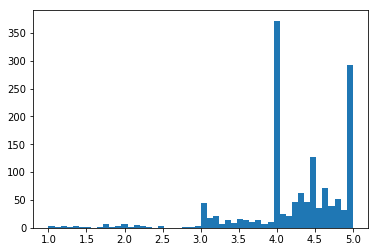

In [25]:
plt.hist(customer_df['weight_level'],bins=50)

(array([ 12.,   9.,  17.,   8.,   7., 105.,  62., 436., 319., 487.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

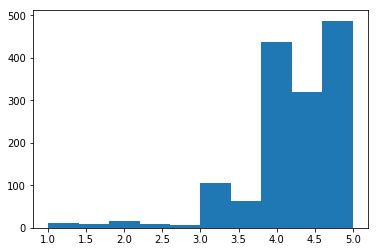

In [26]:
plt.hist(customer_df['weight_level'])

In [27]:
customer_df[['QA風險等級']] = customer_df[['QA風險等級']].apply(pd.to_numeric)

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        8.10e+01, 0.00e+00, 0.00e+00, 1.44e+03]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

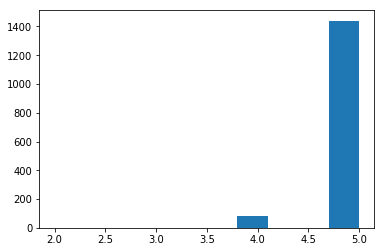

In [28]:
plt.hist(customer_df['QA風險等級'])

In [29]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 100066 to 99313
Data columns (total 24 columns):
weight_level    1462 non-null float64
A0              1522 non-null object
A01             1522 non-null object
A02             1522 non-null object
A03             1522 non-null object
A04             1522 non-null object
A05             1520 non-null object
A06             1520 non-null object
A07             1520 non-null object
A08             1520 non-null object
A09             1520 non-null object
A10             1520 non-null object
A11             1520 non-null object
A12             1520 non-null object
A13             1520 non-null object
A14             1520 non-null object
B01             1520 non-null object
B02             1520 non-null object
B03             1520 non-null object
B04             1520 non-null object
B05             1520 non-null object
B06             1520 non-null object
B07             1520 non-null object
QA風險等級          1522 non-null int64

# A0 X

In [30]:
A0_counter = Counter([qans for item in customer_df['A0'] for qans in item])
A0_counter

Counter({1: 1520, '3:中華民國': 1, '3:新加坡': 1, '3:日本': 1})

In [31]:
A01_counter = Counter([qans for item in customer_df['A01'] for qans in item])
A01_counter.most_common()

[(4, 253),
 (5, 218),
 (1, 191),
 (8, 171),
 (21, 137),
 (3, 136),
 (2, 86),
 (6, 76),
 (7, 56),
 (22, 22),
 (14, 22),
 (12, 20),
 (17, 14),
 (9, 10),
 ('24:自由業', 7),
 ('13:日本', 6),
 ('13:美國', 6),
 (18, 4),
 (20, 4),
 ('13:歐美', 3),
 ('13:大陸', 2),
 ('13:德國', 2),
 ('24:傳播', 2),
 ('13:歐洲', 2),
 ('24:補教業', 2),
 ('24:出版業', 2),
 ('24:物流業', 2),
 ('24:未成年人', 2),
 ('24:家教', 2),
 ('24:布商生管', 1),
 ('13:亞洲', 1),
 ('24:自家', 1),
 ('23:力行派報', 1),
 ('23:農業機械', 1),
 ('24:特約導遊', 1),
 ('24:傳播業', 1),
 ('24:打工', 1),
 ('24:國營事業', 1),
 ('23:殯葬業', 1),
 ('23:機車行', 1),
 ('13:日韓', 1),
 ('24:國營企業', 1),
 ('24:科學研究', 1),
 ('13:捷克', 1),
 ('23:冠林電器行', 1),
 ('24:義務役兵役服役中', 1),
 ('13:奈及利亞', 1),
 ('24:自聘', 1),
 ('13:中國大陸', 1),
 ('13:印尼', 1),
 ('23:無', 1),
 (10, 1),
 ('23:電池專賣店', 1),
 ('13:germany', 1),
 ('23:翻譯人員', 1),
 ('24:派遣人力-派駐機關', 1),
 ('24:電子/光學', 1),
 ('23:正煌燈飾', 1),
 ('13:英美', 1),
 ('24:攤商', 1),
 ('24:家管', 1),
 ('13:歐美澳', 1),
 ('24:出版', 1),
 ('24:電子代理業', 1),
 ('24:服務業', 1),
 ('24:外包人員', 1),
 ('24:退休', 1),
 ('23

In [32]:
A02_counter = Counter([qans for item in customer_df['A02'] for qans in item])
A02_counter.most_common()

[(1, 442),
 (2, 311),
 (4, 228),
 (3, 124),
 (5, 85),
 ('7:家管', 84),
 (6, 60),
 ('7:無', 50),
 ('7:退休', 36),
 ('7:學生', 34),
 ('7:退休人士', 11),
 ('7:退休人員', 6),
 ('7:已退休', 3),
 ('7:助理', 3),
 ('7:待業中', 3),
 ('7:學齡前', 3),
 ('7:家庭主婦', 2),
 ('7:自營', 2),
 ('7:未成年人', 2),
 ('7:無 ', 1),
 ('7:0', 1),
 ('7:na', 1),
 ('7:導遊', 1),
 ('7:特約導遊', 1),
 ('7:無職', 1),
 ('7:無業', 1),
 ('7:財會', 1),
 ('7:勞工', 1),
 ('7:業務', 1),
 ('7:約聘助理', 1),
 ('7:夫家事業', 1),
 ('7:義務役兵役服役中', 1),
 ('7:退休老師', 1),
 ('7:家務負責人', 1),
 ('7:退休無職', 1),
 ('7:自聘', 1),
 ('7:家長以子女名義購置', 1),
 ('7:家園管理', 1),
 ('7:休閒農業', 1),
 ('7:Student', 1),
 ('7:店員', 1),
 ('7:家長購置子女名義基金', 1),
 ('7:自由業', 1),
 ('7:退休教師', 1),
 ('7:teacher', 1),
 ('7:外包人員', 1),
 ('7:研究生', 1),
 ('7:館長', 1),
 ('7:合伙人', 1),
 ('7:none', 1),
 ('7:雄聲', 1),
 ('7: 學生', 1),
 ('7:自由研究者(接案、寫作)', 1),
 ('7:碩2生', 1),
 ('7:職員', 1),
 ('7:兼職', 1),
 ('7:家教音樂老師', 1),
 ('7:待業', 1),
 ('7:教師', 1),
 ('7:軍退', 1),
 ('7:倉管', 1),
 ('7:家教老師', 1),
 ('7:日文老師', 1)]

In [48]:
A031 = [qans for item in customer_df['A03'] for qans in item]
A031_counter = Counter([x for x in A03 if type(x)==str and x[0]=='1'])

In [52]:
A03_counter.most_common()

[('1:無', 143),
 ('1:家管', 43),
 ('1:野村投信', 23),
 ('1:退休', 19),
 ('1:學生', 11),
 ('1:學校', 10),
 ('1:自家', 9),
 ('1:家', 8),
 ('1:台電', 7),
 ('1:中華郵政', 7),
 ('1:自營', 7),
 ('1:待業中', 6),
 ('1:彰化銀行', 6),
 ('1:退休人士', 5),
 ('1:家裡', 5),
 ('1:0', 5),
 ('1:中華電信', 5),
 ('1:已退休', 5),
 ('1:醫院', 4),
 ('1:公務機關', 4),
 ('1:科技公司', 4),
 ('1:貿易公司', 4),
 ('1:自由業', 4),
 ('1:國小', 4),
 ('1:自宅', 4),
 ('1:野村證券投資信託股份有限公司', 3),
 ('1:基金會', 3),
 ('1:長庚醫院', 3),
 ('1:台灣大學', 3),
 ('1:no', 3),
 ('1:學齡前', 3),
 ('1:投信投顧公會', 2),
 ('1:台大', 2),
 ('1:MTK', 2),
 ('1:廣達電腦', 2),
 ('1:元大銀行', 2),
 ('1:公家機關', 2),
 ('1:富邦', 2),
 ('1:私人企業', 2),
 ('1:台積電', 2),
 ('1:11', 2),
 ('1:公', 2),
 ('1:家庭', 2),
 ('1:中興大學', 2),
 ('1:台灣中油股份有限公司', 2),
 ('1:衛福部', 2),
 ('1:聯合報', 2),
 ('1:0000', 2),
 ('1:國防部', 2),
 ('1:板信商銀', 2),
 ('1:富邦人壽', 2),
 ('1:全豐利實業有限公司', 2),
 ('1:國民小學', 2),
 ('1:診所', 2),
 ('1:屏山國小', 2),
 ('1:家中', 2),
 ('1:補習班', 2),
 ('1:桃園醫院', 2),
 ('1:友達光電', 2),
 ('1:私人公司', 2),
 ('1:國泰世華銀行', 2),
 ('1:勞保局', 2),
 ('1:東華大學', 2),
 ('1:自營商', 2),
 ('1:

In [51]:
A032_counter = Counter([x for x in A03 if type(x)==str and x[0]=='2'])
A032_counter.most_common()

[('2:無', 152),
 ('2:家管', 43),
 ('2:會計', 43),
 ('2:業務', 39),
 ('2:財務部', 29),
 ('2:業務部', 29),
 ('2:教師', 27),
 ('2:學生', 23),
 ('2:行政', 19),
 ('2:退休', 18),
 ('2:管理部', 17),
 ('2:負責人', 17),
 ('2:財務', 13),
 ('2:經理', 12),
 ('2:總經理室', 11),
 ('2:採購', 10),
 ('2:管理', 9),
 ('2:教務處', 9),
 ('2:品管', 7),
 ('2:學務處', 7),
 ('2:已退休', 7),
 ('2:職員', 7),
 ('2:老師', 7),
 ('2:待業中', 6),
 ('2:助理', 6),
 ('2:工程師', 6),
 ('2:0', 6),
 ('2:總務處', 6),
 ('2:研發部', 6),
 ('2:工程部', 6),
 ('2:設計部', 6),
 ('2:自營', 6),
 ('2:研發', 6),
 ('2:家', 6),
 ('2:IT', 5),
 ('2:退休人士', 5),
 ('2:設計', 5),
 ('2:行政部門', 5),
 ('2:資訊部', 5),
 ('2:主管', 5),
 ('2:會計部', 5),
 ('2:企劃', 5),
 ('2:營業部', 4),
 ('2:RD', 4),
 ('2:門診', 4),
 ('2:工務部', 4),
 ('2:秘書室', 4),
 ('2:數位理財部', 4),
 ('2:生產部', 4),
 ('2:總經理', 4),
 ('2:主任', 4),
 ('2:自家', 4),
 ('2:自宅', 4),
 ('2:行銷', 4),
 ('2:藥局', 4),
 ('2:基金事務部', 3),
 ('2:財會', 3),
 ('2:人事室', 3),
 ('2:店長', 3),
 ('2:銷售', 3),
 ('2:維修部', 3),
 ('2:資材部', 3),
 ('2:工程', 3),
 ('2:電機系', 3),
 ('2:家裡', 3),
 ('2:000', 3),
 ('2:店員', 3),
 ('2:存匯', 3

In [53]:
A04_counter = Counter([qans for item in customer_df['A04'] for qans in item])
A04_counter.most_common()

[(4, 669), (5, 359), (3, 299), (2, 160), (1, 35)]

In [62]:
A05_counter = Counter([qans for item in customer_df['A05'] if str(item)!='nan' for qans in item ])
A05_counter.most_common()

[('2:2', 470),
 (3, 315),
 ('1:0', 299),
 ('2:1', 166),
 ('2:3', 110),
 ('2:0', 69),
 ('1:無', 16),
 ('2:4', 12),
 ('2:2人', 11),
 ('1:1', 7),
 ('1:2', 7),
 ('1:未婚', 4),
 ('1:3', 4),
 ('2:無', 3),
 ('2:3人', 3),
 ('1:單身', 2),
 ('1:無子女', 2),
 ('1:０', 2),
 ('1:子女未成年', 2),
 ('2:2位', 2),
 ('2:2女1男', 1),
 ('2:一子一女', 1),
 ('2:兩', 1),
 ('2:7', 1),
 ('2:1位', 1),
 ('2:2個', 1),
 (2, 1),
 ('2:＿', 1),
 ('2:ㄉ', 1),
 ('2:ˊ', 1),
 ('2:1人', 1),
 ('2:ˇ', 1),
 ('1:零', 1),
 ('2:2小', 1),
 ('2:ㄅ', 1),
 ('1:5', 1),
 ('2:2女', 1),
 ('1:09', 1),
 ('1:學齡前', 1)]

In [64]:
A06_counter = Counter([qans for item in customer_df['A06'] if str(item)!='nan' for qans in item ])
A06_counter.most_common()

[(1, 1421),
 (2, 23),
 (3, 15),
 ('6:非外國人', 13),
 ('6:本國人', 10),
 ('6:無', 10),
 ('6:非外國人士', 7),
 (4, 4),
 (5, 3),
 ('6:退休', 2),
 ('6:我是本國人', 1),
 ('6:na', 1),
 ('6:jno', 1),
 ('6:非', 1),
 ('6:我不是外國人', 1),
 ('6:討口飯吃', 1),
 ('6:本國', 1),
 ('6:我是本國人喔', 1),
 ('6:為本國人', 1),
 ('6:本國人士', 1),
 ('6:88454', 1),
 ('6:0', 1),
 ('6:no', 1),
 ('6:000', 1),
 ('6:台灣人', 1),
 ('6:非外籍', 1),
 ('6:本國人...', 1)]

In [66]:
A07_counter = Counter([qans for item in customer_df['A07'] if str(item)!='nan' for qans in item ])
A07_counter.most_common()

[(1, 1520)]

In [69]:
A08_counter = Counter([qans for item in customer_df['A08'] if str(item)!='nan' for qans in item ])
A08_counter.most_common()

[(5, 1029),
 (1, 1003),
 (3, 784),
 (4, 300),
 (2, 128),
 (6, 122),
 ('7:購屋', 1),
 ('7:增加資產', 1),
 ('7:生活', 1),
 ('7:儲存教育基金', 1)]

In [70]:
A09_counter = Counter([qans for item in customer_df['A09'] if str(item)!='nan' for qans in item ])
A09_counter.most_common()

[(1, 1144),
 (3, 871),
 (2, 251),
 (7, 106),
 (4, 104),
 (8, 96),
 (6, 21),
 (5, 14),
 ('9:存款', 5),
 ('9:學齡前', 2),
 ('9:壓歲錢', 2),
 ('9:其他', 1),
 ('9:無', 1),
 ('9:接案子', 1),
 ('9:儲蓄', 1),
 ('9:安家費', 1),
 ('9:兼職收入', 1),
 ('9:個人隱私', 1)]

In [74]:
A10_counter = Counter([qans for item in customer_df['A10'] if str(item)!='nan' for qans in item ])
A10_counter.most_common()

[(3, 773), (2, 472), (1, 151), (4, 107), (5, 29)]

In [72]:
A11_counter = Counter([qans for item in customer_df['A11'] if str(item)!='nan' for qans in item ])
A11_counter.most_common()

[(2, 703), (1, 578), (3, 235), (4, 11), (5, 6)]

In [75]:
A12_counter = Counter([qans for item in customer_df['A12'] if str(item)!='nan' for qans in item ])
A12_counter.most_common()

[(1, 1190), (2, 256), (3, 82)]

In [76]:
A13_counter = Counter([qans for item in customer_df['A13'] if str(item)!='nan' for qans in item ])
A13_counter.most_common()

[(1, 1362), (2, 164)]

In [77]:
A14_counter = Counter([qans for item in customer_df['A14'] if str(item)!='nan' for qans in item ])
A14_counter.most_common()

[(4, 1464), (1, 25), (3, 18), (2, 13)]

In [79]:
B01_counter = Counter([qans for item in customer_df['B01'] if str(item)!='nan' for qans in item ])
B01_counter.most_common()

[(4, 586), (5, 570), (3, 270), (2, 67), (1, 30)]

In [80]:
B02_counter = Counter([qans for item in customer_df['B02'] if str(item)!='nan' for qans in item ])
B02_counter.most_common()

[(1, 1315), (4, 1275), (5, 976), (3, 930), (2, 701)]

In [81]:
B03_counter = Counter([qans for item in customer_df['B03'] if str(item)!='nan' for qans in item ])
B03_counter.most_common()

[(4, 1244), (5, 1067), (3, 698), (2, 396), (1, 227)]

In [82]:
B04_counter = Counter([qans for item in customer_df['B04'] if str(item)!='nan' for qans in item ])
B04_counter.most_common()

[(5, 798), (3, 380), (4, 208), (2, 129), (1, 17)]

In [83]:
B05_counter = Counter([qans for item in customer_df['B05'] if str(item)!='nan' for qans in item ])
B05_counter.most_common()

[(4, 872), (3, 619), (5, 30), (2, 5), (1, 2)]

In [84]:
B06_counter = Counter([qans for item in customer_df['B06'] if str(item)!='nan' for qans in item ])
B06_counter.most_common()

[(5, 533), (4, 473), (3, 391), (2, 127), (1, 8)]

In [85]:
B07_counter = Counter([qans for item in customer_df['B07'] if str(item)!='nan' for qans in item ])
B07_counter.most_common()

[(5, 609), (4, 371), (3, 306), (2, 180), (1, 68)]

In [60]:
for item in customer_df['A05']:
    if type(item) == float:
            print(item)
    #for qan in item:
        

nan
nan
